[View in Colaboratory](https://colab.research.google.com/github/costa-la-costa/NeuroNet/blob/master/My_Copy_of_cifar10.ipynb)

# Распознавание объектов на изображениях из набора данных CIFAR-10

Пример из курса ["Программирование глубоких нейронных сетей на Python"](https://www.asozykin.ru/courses/nnpython).

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

In [1]:
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import image
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline 

Using TensorFlow backend.


In [0]:
# Размер мини-выборки
batch_size = 32
# Количество классов изображений
nb_classes = 10
# Количество эпох для обучения
nb_epoch = 25
# Размер изображений
img_rows, img_cols = 32, 32
# Количество каналов в изображении: RGB
img_channels = 3
# Названия классов из набора данных CIFAR-10
classes=['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

## Подготовка данных

**Загружаем данные**

In [0]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

**Просмотр примеров данных**

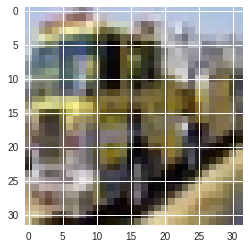

Номер класса: [9]
Тип объекта: грузовик


In [6]:
n = 9541
plt.imshow(toimage(X_train[n]))
plt.show()
print("Номер класса:", y_train[n])
print("Тип объекта:", classes[y_train[n][0]])

**Нормализуем данные**

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Преобразуем правильные ответы в формат one hot encoding**

In [0]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

## Создаем нейронную сеть

In [0]:
# Создаем последовательную модель
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same',
                        input_shape=(32, 32, 3), activation='relu'))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(512, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))

**Печатаем информацию о сети**

In [9]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

**Компилируем модель**

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [11]:
history = model.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.1,
              shuffle=True,
              verbose=2)

Train on 45000 samples, validate on 5000 samples
Epoch 1/25
 - 37s - loss: 1.5296 - acc: 0.4421 - val_loss: 1.1461 - val_acc: 0.5930
Epoch 2/25
 - 35s - loss: 1.1151 - acc: 0.6032 - val_loss: 0.9683 - val_acc: 0.6588
Epoch 3/25
 - 34s - loss: 0.9651 - acc: 0.6600 - val_loss: 0.8605 - val_acc: 0.7030
Epoch 4/25
 - 35s - loss: 0.8693 - acc: 0.6938 - val_loss: 0.7605 - val_acc: 0.7370
Epoch 5/25
 - 35s - loss: 0.7951 - acc: 0.7181 - val_loss: 0.8103 - val_acc: 0.7238
Epoch 6/25
 - 34s - loss: 0.7435 - acc: 0.7382 - val_loss: 0.7403 - val_acc: 0.7474
Epoch 7/25
 - 35s - loss: 0.7003 - acc: 0.7534 - val_loss: 0.7736 - val_acc: 0.7306
Epoch 8/25
 - 35s - loss: 0.6569 - acc: 0.7665 - val_loss: 0.6965 - val_acc: 0.7630
Epoch 9/25
 - 35s - loss: 0.6283 - acc: 0.7773 - val_loss: 0.6567 - val_acc: 0.7722
Epoch 10/25
 - 35s - loss: 0.5971 - acc: 0.7879 - val_loss: 0.6832 - val_acc: 0.7730
Epoch 11/25
 - 35s - loss: 0.5719 - acc: 0.7985 - val_loss: 0.7299 - val_acc: 0.7566
Epoch 12/25
 - 34s - loss

## Оцениваем качетсво обучения сети

In [14]:
# Оцениваем качество обучения модели на тестовых данных
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 77.19%


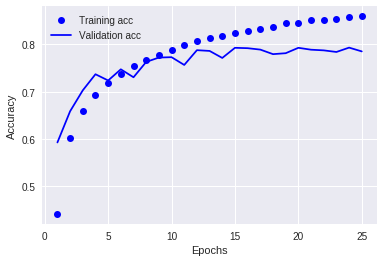

In [15]:
history_dict = history.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Сохраняем обученную нейронную сеть

In [0]:
model_json = model.to_json()
json_file = open("cifar10_model.json", "w")
json_file.write(model_json)
json_file.close()
model.save_weights("cifar10_model.h5")

In [17]:
!ls

cifar10_model.h5  cifar10_model.json  datalab


In [0]:
from google.colab import files

In [0]:
files.download("cifar10_model.json")

In [0]:
files.download("cifar10_model.h5")

## Применяем сеть для распознавания объектов на изображениях

**Просмотр изображения из набора данных для тестирования**

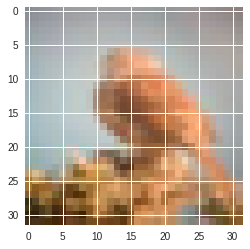

In [22]:
index=113
plt.imshow(toimage(X_test[index]))
plt.show()

**Преобразование тестового изображения**

In [0]:
x = X_test[index]
x = np.expand_dims(x, axis=0)

**Запуск распознавания**

In [0]:
prediction = model.predict(x)

**Печатаем результаты распознавания**

In [27]:
print(prediction)

[[9.2986358e-10 1.8273055e-13 9.9540919e-01 9.7184056e-05 4.2377501e-06
  8.2093334e-07 4.4885245e-03 2.1981856e-09 8.2816803e-10 6.6550530e-13]]


**Преобразуем результаты из формата one hot encoding**

In [28]:
prediction = np.argmax(prediction)
print(classes[prediction])

птица


**Печатаем правильный ответ**

In [29]:
print(classes[y_test[index][0]])

птица


## Распознаем дополнительное изображение

In [31]:
from google.colab import files

files.upload()

Saving 20161022_102318.jpg to 20161022_102318.jpg


{'20161022_102318.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe1O\x10Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x0c\x01\x0f\x00\x02\x00\x00\x00\x0f\x00\x00\x08\xaa\x01\x10\x00\x02\x00\x00\x00\x08\x00\x00\x08\xba\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x08\xc2\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x08\xca\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x011\x00\x02\x00\x00\x00.\x00\x00\x08\xd2\x012\x00\x02\x00\x00\x00\x14\x00\x00\t\x00\x02\x13\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x87i\x00\x04\x00\x00\x00\x01\x00\x00\t\x14\x88%\x00\x04\x00\x00\x00\x01\x00\x00\x14t\xea\x1c\x00\x07\x00\x00\x08\x0c\x00\x00\x00\x9e\x00\x00\x14\x9c\x1c\xea\x00\x00\x00\x08\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\

Проверяем загрузку файлов

In [33]:
!ls

20161022_102318.jpg  cifar10_model.h5  cifar10_model.json  datalab


**Смотрим загруженную картинку**

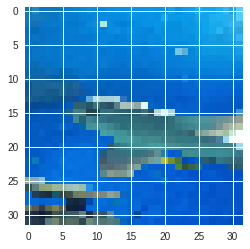

In [34]:
img_path = '20161022_102318.jpg'
img = image.load_img(img_path, target_size=(32, 32))
plt.imshow(img)
plt.show()

**Преобразуем картинку в массив для распознавания**

In [0]:
x = image.img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [36]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print(classes[prediction])

корабль
